In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
data = pd.read_csv('checkins.dat', sep='|')
data.columns = [x.strip() for x in data.columns.values]

In [52]:
data.columns

Index([u'id', u'user_id', u'venue_id', u'latitude', u'longitude',
       u'created_at'],
      dtype='object')

In [96]:
data = data.drop([x for x,y in enumerate(pd.to_numeric(data['longitude'],\
                                                       errors='coerce').isnull()) if y])

for label in data.columns.values[:-1]:
    data[label] = pd.to_numeric(data[label])

In [159]:
data_t = data[['latitude','longitude']].iloc[0:100000]

In [160]:
from sklearn.cluster import MeanShift

In [181]:
# ms = MeanShift(bandwidth=0.1)
ms = MeanShift(bandwidth=0.1)
X = data_t.as_matrix()
ms.fit(X)

MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [196]:
# print X

labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print len(cluster_centers)
print len(labels)

3230
100000


In [197]:
from collections import Counter
freq_en = [x for x,y in Counter(labels).most_common(1000) if y >= 15]
len(freq_en)
# labels = freq_en

624

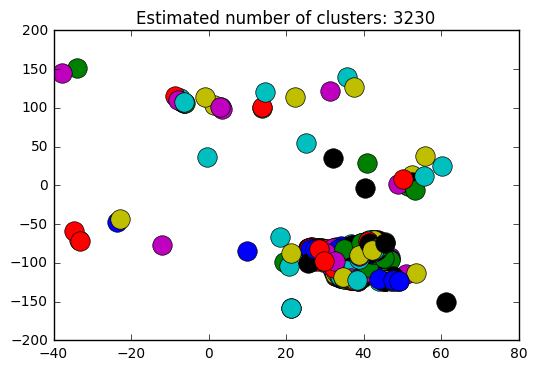

In [198]:
from itertools import cycle

colors = cycle('bgrcmyk')
for k, col in zip(freq_en, colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [210]:
my_centers = cluster_centers[freq_en]

from scipy import spatial

pt = [[33.751277, -118.188740],
        [25.867736, -80.324116],
        [51.503016, -0.075479],
        [52.378894, 4.885084],
        [39.366487, 117.036146],
        [-33.868457, 151.205134]]
for x in pt:
    distance,index = spatial.KDTree(my_centers).query(x)
    print distance
    print my_centers[spatial.KDTree(my_centers).query(x)[1]]

# for x in my_centers:
#     print ','.join(map(str,x))

0.0708477324272
[  33.80987796 -118.14892381]
0.0226740661584
[ 25.84567226 -80.3188906 ]
0.0500582948228
[ 51.50299126  -0.12553729]
0.00935331618599
[ 52.37296399   4.89231722]
9.26757501077
[  31.230393  121.473704]
0.00783475816311
[ -33.86063043  151.20477593]
